# LeNet 5

En este Notebook se va a implementar la red convolucional **LeNet 5** en el dataset de nubes creado anteriormente.

In [1]:
from sklearn.externals import joblib

import numpy as np
import pandas as pd
import sklearn.utils
import matplotlib.pyplot as plt

%matplotlib inline

Primero cargamos los datos desde el disco

In [2]:
cloud_pd = joblib.load('data/clouds.pkl')
cloud_pd = sklearn.utils.shuffle(cloud_pd)

Dividimos el dataset en sets de train y test.

In [3]:
batchsize = 32
nData = cloud_pd.shape[0]
nData_training = int(nData * 2/3)

# Batches number for training
batches = int(nData_training / batchsize)
nData_testing = nData - nData_training

print('- Number Data training: {}'.format(nData_training))
print('- Number batches: {}'.format(batches))
print('- Number Data testing: {}'.format(nData_testing))

- Number Data training: 13312
- Number batches: 416
- Number Data testing: 6656


In [35]:
cloud_x = cloud_pd.iloc[:nData_training, 2:]
cloud_y = cloud_pd.iloc[:nData_training, 0]

cloud_test_x = cloud_pd.iloc[nData_testing:, 2:]
cloud_test_y = cloud_pd.iloc[nData_testing:, 0]

Importar paquetes necesarios de **pyTorch** y convertir los datos a tensores.

In [33]:
from torch.autograd import Variable

import torch
import torch.nn as nn
import torch.optim

In [36]:
# Training
cloud_x = cloud_x.values.reshape((batches, batchsize, 
                                  32, 32, 3)).astype('uint8')
cloud_x = np.transpose(cloud_x, axes=(0, 1, 4, 2, 3))

cloud_y = cloud_y.values.reshape((batches, batchsize))

# Testing
cloud_test_x = cloud_test_x.values.reshape((cloud_test_x.shape[0],
                                            32, 32, 3)).astype('uint8')
cloud_test_x = np.transpose(cloud_test_x, axes=(0, 3, 1, 2))

cloud_test_y = cloud_test_y.values

# Convert to tensors
cloud_x = Variable(torch.Tensor(cloud_x).contiguous().cuda())
cloud_y = Variable(torch.LongTensor(cloud_y).contiguous().cuda())
cloud_test_x = Variable(torch.Tensor(cloud_test_x).contiguous().cuda())

print('- Cloud_x {}'.format(cloud_x.shape))
print('- Cloud_y {}'.format(cloud_y.shape))
print('- Cloud_test_x {}'.format(cloud_test_x.shape))
print('- Cloud_test_y {}'.format(cloud_test_y.shape))

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: double, float, float16, int64, int32, and uint8.

#### TODO: Cambiar etiquetas a int

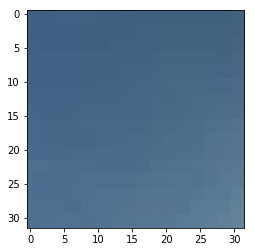

In [27]:
plt.imshow(np.transpose(cloud_x[3, 0], axes=(1, 2, 0)))
plt.show()

In [ ]:
np.transpose